### IMPORTING .JSON FILES

In [1]:
import json
from google.colab import files
uploaded = files.upload()

Saving ver1_scrapedweb-107.json to ver1_scrapedweb-107.json
Saving ver1_scrapedweb-1023.json to ver1_scrapedweb-1023.json
Saving ver1_scrapedweb-1024.json to ver1_scrapedweb-1024.json
Saving ver1_scrapedweb-1025.json to ver1_scrapedweb-1025.json
Saving ver1_scrapedweb-1026.json to ver1_scrapedweb-1026.json
Saving ver1_scrapedweb-1027.json to ver1_scrapedweb-1027.json
Saving ver1_scrapedweb-1030.json to ver1_scrapedweb-1030.json
Saving ver1_scrapedweb-1031.json to ver1_scrapedweb-1031.json
Saving ver1_scrapedweb-1032.json to ver1_scrapedweb-1032.json
Saving ver1_scrapedweb-1033.json to ver1_scrapedweb-1033.json
Saving ver1_scrapedweb-1034.json to ver1_scrapedweb-1034.json
Saving ver1_scrapedweb-1035.json to ver1_scrapedweb-1035.json
Saving ver1_scrapedweb-1036.json to ver1_scrapedweb-1036.json
Saving ver1_scrapedweb-1037.json to ver1_scrapedweb-1037.json
Saving ver1_scrapedweb-1063.json to ver1_scrapedweb-1063.json
Saving ver1_scrapedweb-1065.json to ver1_scrapedweb-1065.json
Saving ver

In [2]:
#List of names of .json files
json_files = ["ver1_scrapedweb-1023.json", "ver1_scrapedweb-1024.json", "ver1_scrapedweb-1025.json",
              "ver1_scrapedweb-1026.json", "ver1_scrapedweb-1027.json", "ver1_scrapedweb-1030.json",
              "ver1_scrapedweb-1031.json", "ver1_scrapedweb-1032.json", "ver1_scrapedweb-1033.json",
              "ver1_scrapedweb-1034.json", "ver1_scrapedweb-1035.json", "ver1_scrapedweb-1036.json",
              "ver1_scrapedweb-1037.json", "ver1_scrapedweb-1063.json", "ver1_scrapedweb-1065.json",
              "ver1_scrapedweb-1068.json", "ver1_scrapedweb-107.json", "ver1_scrapedweb-1070.json",
              ]

Extracting text from .json files.

In [3]:
text =[]
for i in json_files:
  text.append(uploaded[i].decode("utf-8"))
text

['{"text": ["Unedited Photos That Show Just How Crazy The Past Really Was | History Daily", "Susan Sarandon isn\'t just one of the most hard working actresses in film, she dives into films that push her and the audiences to the limit all the while making them into legit crowd pleasers. It\'s astonishing what she can do.While speaking about her roles in films like Pretty Baby and The Last of the Cowboys she explained that she liked to work on movies that were going to put her through the wringer somehow because she wanted to feel like she accomplished something:I try for parts that frighten me or seem impossible.", "\\n", "Susan Sarandon isn\'t just one of the most hard working actresses in film, she dives into films that push her and the audiences to the limit all the while making them into legit crowd pleasers. It\'s astonishing what she can do.", "While speaking about her roles in films like ", "Pretty Baby", " and ", "The Last of the Cowboys", " she explained that she liked to work 

## IMPORTING THE LIBRARIES AND INSTALLING THE PACKAGES

In [ ]:
pip install pyLDAvis

In [5]:
import os
import pandas as pd
import re
import numpy as np

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


### FOR STOPWORDS

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('n')
stop_words.append('r')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FOR LEMMATIZATION

In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

FOR STEMMING

In [8]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

FOR BIGRAMS

In [9]:
from nltk.util import bigrams
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

CLEANING AND FILTERING RAW TEXT

In [10]:
filtered_text = []     #TO STORE THE PROCESSED DATA

bigrams = []    
for t in text:
    filtered_sentence = ""
    stemmed_list = []
    lemmatized_list = []
    
    sentence = str(t)

    #Data Cleansing
    sentence = re.sub(r'[^\w\s]', ' ', sentence)


    #Removing numbers
    sentence = re.sub(r'[0-9]', '', sentence)
    
    #Tokenization
    words = nltk.word_tokenize(sentence)
    
    #Stop words removal
    words = [w for w in words if not w in stop_words]
    
    #Stemming
    for word in words:
        stemmed_word = stemmer.stem(word)
        stemmed_list.append(stemmed_word)
        
    #Lemmatization
    for s_word in stemmed_list:
        lemmatized_word = lemmatizer.lemmatize(s_word)
        lemmatized_list.append(lemmatized_word)

    
    lemmatized_list = [i for i in lemmatized_list if len(i) >= 3]
    
    filtered_text.append(lemmatized_list)  

## PROCESSED TEXT

In [ ]:
filtered_text

In [12]:
len(filtered_text)

18

### Bigram amd Trigram Formation

In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(filtered_text) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[filtered_text])  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
for i in range(len(filtered_text)):
    print(trigram_mod[bigram_mod[filtered_text[i]]])

['text', 'unedit', 'photo', 'that', 'show', 'just', 'how', 'crazi', 'the', 'past', 'realli', 'histori', 'daili', 'susan', 'sarandon', 'one', 'hard', 'work', 'actress', 'film', 'dive', 'film', 'push', 'audienc', 'limit', 'make', 'legit', 'crowd', 'pleaser', 'astonish', 'while', 'speak', 'role', 'film', 'like', 'pretti', 'babi', 'the', 'last', 'cowboy', 'explain', 'like', 'work', 'movi', 'put', 'wringer', 'somehow', 'want', 'feel', 'like', 'accomplish', 'someth', 'tri', 'part', 'frighten', 'seem', 'imposs', 'susan', 'sarandon', 'one', 'hard', 'work', 'actress', 'film', 'dive', 'film', 'push', 'audienc', 'limit', 'make', 'legit', 'crowd', 'pleaser', 'astonish', 'while', 'speak', 'role', 'film', 'like', 'pretti', 'babi', 'the', 'last', 'cowboy', 'explain', 'like', 'work', 'movi', 'put', 'wringer', 'somehow', 'want', 'feel', 'like', 'accomplish', 'someth', 'groovi', 'histori', 'groovi', 'histori', 'writer']
['text', 'watch', 'abc', 'watch', 'abc', 'onlin', 'main', 'navig', 'eyebrow', 'navig

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### Creating the dictionary and the corpus needed for topic Modeling.

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(filtered_text)

# Create Corpus
texts = filtered_text

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 1), (7, 2), (8, 1), (9, 2), (10, 2), (11, 2), (12, 6), (13, 1), (14, 2), (15, 2), (16, 3), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 6), (23, 2), (24, 2), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1), (30, 2), (31, 2), (32, 2), (33, 2), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1), (39, 2), (40, 2), (41, 2), (42, 2), (43, 1), (44, 1), (45, 3), (46, 1), (47, 1), (48, 2), (49, 2), (50, 4), (51, 2), (52, 1)], [(43, 1), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2)], [(16, 3), (24, 1), (43, 1), (45, 4), (48, 1), (49, 1), (50, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 3), (69, 2), (70, 1), (71, 1), (72, 18), (73, 2), (74, 2), (75, 1), (76, 2), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 6), (86, 1), (87, 2), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (

In [15]:
id2word[0]

'accomplish'

In [16]:
len(corpus)

18

### TERM FREQUENCY

In [17]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accomplish', 2),
  ('actress', 2),
  ('astonish', 2),
  ('audienc', 2),
  ('babi', 2),
  ('cowboy', 2),
  ('crazi', 1),
  ('crowd', 2),
  ('daili', 1),
  ('dive', 2),
  ('explain', 2),
  ('feel', 2),
  ('film', 6),
  ('frighten', 1),
  ('groovi', 2),
  ('hard', 2),
  ('histori', 3),
  ('how', 1),
  ('imposs', 1),
  ('just', 1),
  ('last', 2),
  ('legit', 2),
  ('like', 6),
  ('limit', 2),
  ('make', 2),
  ('movi', 2),
  ('one', 2),
  ('part', 1),
  ('past', 1),
  ('photo', 1),
  ('pleaser', 2),
  ('pretti', 2),
  ('push', 2),
  ('put', 2),
  ('realli', 1),
  ('role', 2),
  ('sarandon', 2),
  ('seem', 1),
  ('show', 1),
  ('somehow', 2),
  ('someth', 2),
  ('speak', 2),
  ('susan', 2),
  ('text', 1),
  ('that', 1),
  ('the', 3),
  ('tri', 1),
  ('unedit', 1),
  ('want', 2),
  ('while', 2),
  ('work', 4),
  ('wringer', 2),
  ('writer', 1)]]

## BUILDING THE LDA TOPIC MODEL

In [18]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## VIEWING THE TOPICS IN LDA MODEL

In [19]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"paint" + 0.036*"art" + 0.021*"acryl" + 0.017*"lesson" + 0.010*"com" '
  '+ 0.010*"video" + 0.010*"fun" + 0.010*"beginn" + 0.009*"use" + '
  '0.007*"chapter"'),
 (1,
  '0.028*"friday" + 0.021*"the" + 0.016*"night" + 0.012*"sarasota" + '
  '0.011*"like" + 0.011*"work" + 0.010*"music" + 0.009*"virtual" + 0.009*"sky" '
  '+ 0.009*"event"'),
 (2,
  '0.025*"album" + 0.020*"yanni" + 0.019*"feat" + 0.014*"mix" + '
  '0.013*"download" + 0.011*"video" + 0.010*"the" + 0.008*"vol" + 0.008*"dugg" '
  '+ 0.008*"loaf"'),
 (3,
  '0.017*"malibu" + 0.012*"new" + 0.012*"carpenti" + 0.012*"surfsid" + '
  '0.012*"joann" + 0.012*"germain" + 0.012*"vincent" + 0.006*"text" + '
  '0.006*"all" + 0.006*"copyright"'),
 (4,
  '0.017*"more" + 0.012*"new" + 0.012*"nadhi" + 0.012*"pooja" + 0.012*"read" + '
  '0.006*"film" + 0.006*"text" + 0.006*"movi" + 0.006*"idhi" + 0.006*"review"'),
 (5,
  '0.045*"art" + 0.030*"thiel" + 0.022*"student" + 0.018*"minor" + '
  '0.015*"studio" + 0.015*"colleg" + 0.010*"

In [20]:
Topics = ["Art", "Vacation", "Music", "Person", "Movie", "Art Education", "Movie"]

In [21]:
table_head = ['Topic', 'Keywords']

In [26]:
df = pd.DataFrame(zip(Topics, lda_model.print_topics()), columns= table_head)
print(df)

           Topic                                           Keywords
0            Art  (0, 0.042*"paint" + 0.036*"art" + 0.021*"acryl...
1       Vacation  (1, 0.028*"friday" + 0.021*"the" + 0.016*"nigh...
2          Music  (2, 0.025*"album" + 0.020*"yanni" + 0.019*"fea...
3         Person  (3, 0.017*"malibu" + 0.012*"new" + 0.012*"carp...
4          Movie  (4, 0.017*"more" + 0.012*"new" + 0.012*"nadhi"...
5  Art Education  (5, 0.045*"art" + 0.030*"thiel" + 0.022*"stude...
6          Movie  (6, 0.010*"shrek" + 0.005*"trick" + 0.005*"str...


### Computing Model Perplexity and Coherence Score

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.708232941569285

Coherence Score:  0.6510857530460524


### Visualizing the topics-keywords

In [ ]:
# Visualize the topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis


## Word Clouds of Top N Keywords in Each Topic

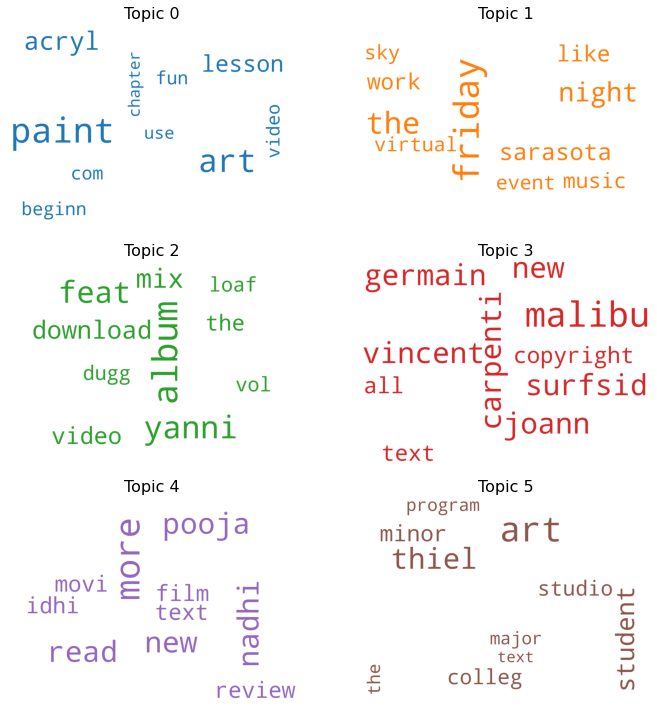

In [29]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=20, hspace=20)
plt.axis('off')
plt.margins(x=10, y=10)
plt.tight_layout()
plt.show()

### LDA MALLET

In [30]:
import os
def install_java_jdk():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version

install_java_jdk

<function __main__.install_java_jdk>

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive

Mounted at /content/gdrive
/content/gdrive


In [33]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

### LdaMallet Model

In [34]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics = 7, id2word = id2word)

In [35]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=filtered_text, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('friday', 0.06647398843930635),
   ('night', 0.04046242774566474),
   ('sarasota', 0.028901734104046242),
   ('music', 0.023121387283236993),
   ('event', 0.023121387283236993),
   ('parti', 0.014450867052023121),
   ('special', 0.014450867052023121),
   ('walk', 0.011560693641618497),
   ('begin', 0.011560693641618497),
   ('start', 0.011560693641618497)]),
 (1,
  [('art', 0.08674698795180723),
   ('paint', 0.08433734939759036),
   ('acryl', 0.04096385542168675),
   ('lesson', 0.033734939759036145),
   ('thi', 0.024096385542168676),
   ('fun', 0.01927710843373494),
   ('beginn', 0.01927710843373494),
   ('free', 0.014457831325301205),
   ('http', 0.014457831325301205),
   ('enjoy', 0.014457831325301205)]),
 (2,
  [('manhuascan', 0.02824858757062147),
   ('morai', 0.01694915254237288),
   ('nome', 0.01694915254237288),
   ('mostra', 0.01694915254237288),
   ('individu', 0.01694915254237288),
   ('knight', 0.01694915254237288),
   ('linda', 0.01694915254237288),
   ('estreia', 

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=filtered_text, start=2, limit=40, step=6)

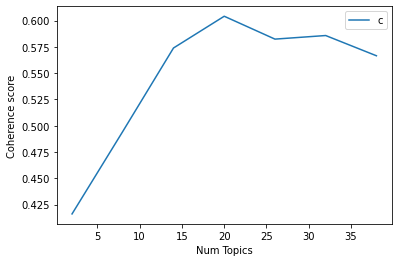

In [38]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 2  has Coherence Value of 0.416
Num Topics = 8  has Coherence Value of 0.495
Num Topics = 14  has Coherence Value of 0.574
Num Topics = 20  has Coherence Value of 0.604
Num Topics = 26  has Coherence Value of 0.582
Num Topics = 32  has Coherence Value of 0.586
Num Topics = 38  has Coherence Value of 0.566


The coherence score obtained from LdaMallet model is lower as compared to LdaModel.

## TOPICS DISTRIBUTION

In [42]:
Topic_distribution= []
for i in range(18):
  tokens = [stemmer.stem(token) for token in nltk.word_tokenize(text[i].lower()) if token not in stop_words]
  print(lda_model[id2word.doc2bow(tokens)][0])
  Topic_distribution.append(lda_model[id2word.doc2bow(tokens)][0])

[(1, 0.9972736)]
[(2, 0.90116966), (4, 0.0809923)]
[(5, 0.99871)]
[(6, 0.9941008)]
[(2, 0.9957871)]
[(0, 0.98018724)]
[(4, 0.9877099)]
[(2, 0.9992108)]
[(1, 0.99935806)]
[(1, 0.9694198)]
[(5, 0.9795333)]
[(0, 0.98655033), (4, 0.011031154)]
[(3, 0.8997416), (4, 0.08941304)]
[(1, 0.9970863)]
[(1, 0.97534615)]
[(0, 0.98018724)]
[(0, 0.99942666)]
[(0, 0.04247898), (1, 0.049659863), (2, 0.037124317), (3, 0.02552451), (4, 0.025281526), (5, 0.7934694), (6, 0.026461355)]


### DATAFRAME :
DISPLAYING THE PERCENTAGE DISTRIBUTION OF TOPICS IN EACH DOCUMNET

In [44]:
tab_head = ["Web Page File", "Tokenized Text", "Topics Distribution"]
df_data = pd.DataFrame(zip(text,filtered_text, Topic_distribution), columns = tab_head)
print(df_data)

                                        Web Page File  ...                                Topics Distribution
0   {"text": ["Unedited Photos That Show Just How ...  ...                                   [(1, 0.9972736)]
1   {"text": ["Watch | ABC6", "Watch ABC6 online",...  ...                  [(2, 0.9011691), (4, 0.08099286)]
2   {"text": ["Art | Thiel College", "Thiel Colleg...  ...                                     [(5, 0.99871)]
3   {"text": [" Watch Shrek Forever After (2010) -...  ...                                   [(6, 0.9941008)]
4   {"text": ["Manual de can\u00e7\u00f5es de 28 A...  ...                                   [(2, 0.9957871)]
5   {"text": ["FORCE OF FEELING Chapter 1 - Manhua...  ...                                  [(0, 0.98018724)]
6   {"text": ["\r\n\tIdhi Nadhi Movie Pooja Ceremo...  ...                                   [(4, 0.9877099)]
7   {"text": ["DOWNLOAD DeJ Loaf - Tap In (feat. 4...  ...                                   [(2, 0.9992108)]
8   {"text